In [13]:
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import framenet as fn
import pandas as pd
import seaborn as sns

nltk.download("wordnet")
nltk.download("framenet_v17")

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ryanschaefer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package framenet_v17 to
[nltk_data]     /Users/ryanschaefer/nltk_data...
[nltk_data]   Package framenet_v17 is already up-to-date!


True

In [9]:
lexical_units = fn.lus()
lu_names = list(set(map(lambda x: x.name, lexical_units)))

print("Total unique lexical units: {}".format(len(lu_names)))

Total unique lexical units: 10462


In [11]:
lu_frames = { key: [] for key in lu_names }
    
for lu in lexical_units:
    lu_frames[lu.name].append(lu.frame.name)
    
multi_frame_units = []
for name, frames in lu_frames.items():
    if len(frames) > 1:
        multi_frame_units.append(name)
    
print("Lexical units with more than 1 frame: {}".format(len(multi_frame_units)))

Lexical units with more than 1 frame: 1987


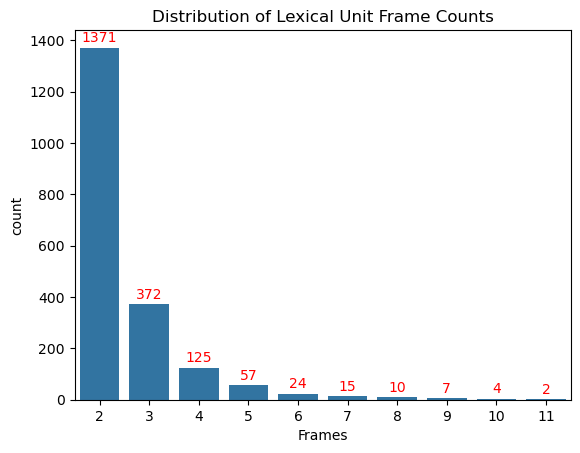

In [28]:
df = pd.DataFrame({
    "Lexical Unit": multi_frame_units,
    "Frames": list(map(lambda x: len(lu_frames[x]), multi_frame_units))
})

sns.countplot(df, x = "Frames")
plt.title("Distribution of Lexical Unit Frame Counts")

counts = df["Frames"].value_counts()
for i, cnt in enumerate(counts):
    plt.annotate(
        str(cnt),
        (i, cnt),
        textcoords = "offset points",
        xytext = (0, 4),
        ha = "center",
        color = "red"
    )

plt.show()

In [25]:
lu_sentences = { key: [] for key in multi_frame_units }

for name in multi_frame_units:
    sentences = []
    for lu in fn.lus(name):
        for sentence in lu.exemplars:
            sentences.append(sentence.text)
    lu_sentences[name] = sentences

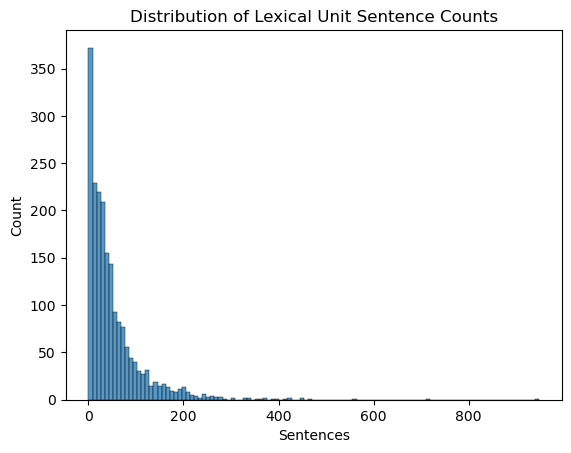

In [30]:
df["Sentences"] = list(map(lambda x: len(lu_sentences[x]), multi_frame_units))

sns.histplot(df, x = "Sentences")
plt.title("Distribution of Lexical Unit Sentence Counts")

plt.show()